<a href="https://colab.research.google.com/github/ACatapang/cmsc191-final-project/blob/main/Autoencoder_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries
We have the following:
*   numpy is imported as np for numerical operations.
*   matplotlib.pyplot is imported as plt for plotting.
*   Importing specific layers and models from Keras for building and training neural networks.
*   Importing the MNIST dataset from Keras, a dataset of handwritten digits.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow_datasets as tfds
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
import time
import cv2


## Importing dataset from Google Drive

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory="/content/drive/Shareddrives/CMSC 191/CMSC 191 GenAI Datasets",
    labels='inferred',
    label_mode='categorical',
    batch_size=7,
    image_size=(30, 40))

print(train_ds)

Found 1620 files belonging to 1 classes.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 30, 40, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>


## Loading and Normalizing MNIST Data
Loading the MNIST dataset into training and testing sets.
Normalizing pixel values to be in the range [0, 1] by dividing by 255.0.

In [ ]:
ds_numpy = tfds.as_numpy(train_ds)

# Extract images and labels into separate lists
images = []
labels = []
for image_batch, label_batch in ds_numpy:
    images.extend(image_batch)
    labels.extend(label_batch)

# Convert the lists to NumPy arrays
x_train = np.array(images)
y_train = np.array(labels)


x_train, x_test, y_train, y_test = train_test_split(
    x_train, y_train, test_size=0.3, random_state=42  # Adjust test_size and random_state as needed
)

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0

# 2. Normalize x_test (if you haven't already normalized x_train)
x_test = x_test.astype('float32') / 255.0


## Flattening the Images
Flattening the 28x28 images into 1D arrays of length 784.

In [ ]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

## Defining the Autoencoder Model
Defining a simple autoencoder architecture with three encoding layers and three corresponding decoding layers.
Using ReLU activation for encoding layers and sigmoid activation for the final decoding layer.
Compiling the model with the Adam optimizer and binary cross-entropy loss.

In [ ]:
input_img = Input(shape=(3600,))
encoded = Dense(256, activation='relu')(input_img)  # Added layer
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)  # Added layer

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(256, activation='relu')(decoded)  # Added layer
decoded = Dense(3600, activation='sigmoid')(decoded)  # Added layer

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


## Training the Autoencoder
Training the autoencoder using the training data (x_train) for both input and target.
Training for 50 epochs with a batch size of 256 and shuffling the training data.
Using the validation data (x_test) for validation during training.

In [ ]:
start_time = time.time()

autoencoder.fit(x_train, x_train, epochs=256, batch_size=64, shuffle=True, validation_data=(x_test, x_test))

end_time = time.time()

training_time = end_time - start_time

print(f"Training time: {training_time} seconds")

Epoch 1/256
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.4121 - val_loss: 0.4126
Epoch 2/256
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.4062 - val_loss: 0.4125
Epoch 3/256
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.4143 - val_loss: 0.4125
Epoch 4/256
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.4120 - val_loss: 0.4124
Epoch 5/256
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.4146 - val_loss: 0.4124
Epoch 6/256
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.4140 - val_loss: 0.4125
Epoch 7/256
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.4150 - val_loss: 0.4124
Epoch 8/256
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.4089 - val_loss: 0.4124
Epoch 9/256
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.4076 - val_loss: 0.4124
Epoch 10/256
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.4133 - val_loss: 0.4125
Epoch 11/256
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.4150 - val_loss: 0.4124
Epoch 12/256
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step

## Encoding and Decoding Images
Using the trained autoencoder to encode the test images.

In [ ]:
start_time = time.time()

encoded_imgs = autoencoder.predict(x_test)

end_time = time.time()

prediction_time = end_time - start_time

print(f"Prediction time: {prediction_time} seconds")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Prediction time: 0.19548344612121582 seconds


## Plotting Original and Reconstructed Images
Plotting a comparison of the original and reconstructed images for a specified number (n) of digits.
Displaying the original images in the top row and the reconstructed images in the bottom row.

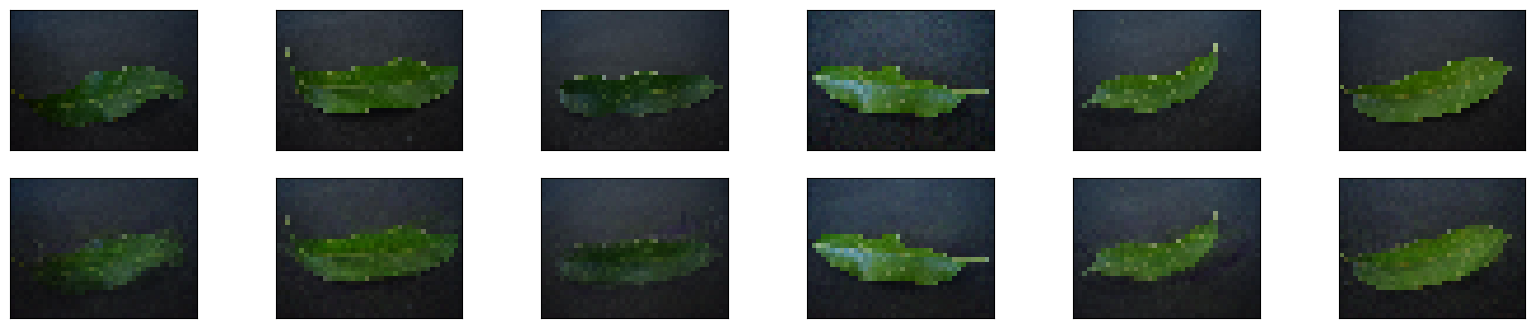

In [ ]:
n = 6
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(30, 40, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(30, 40, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


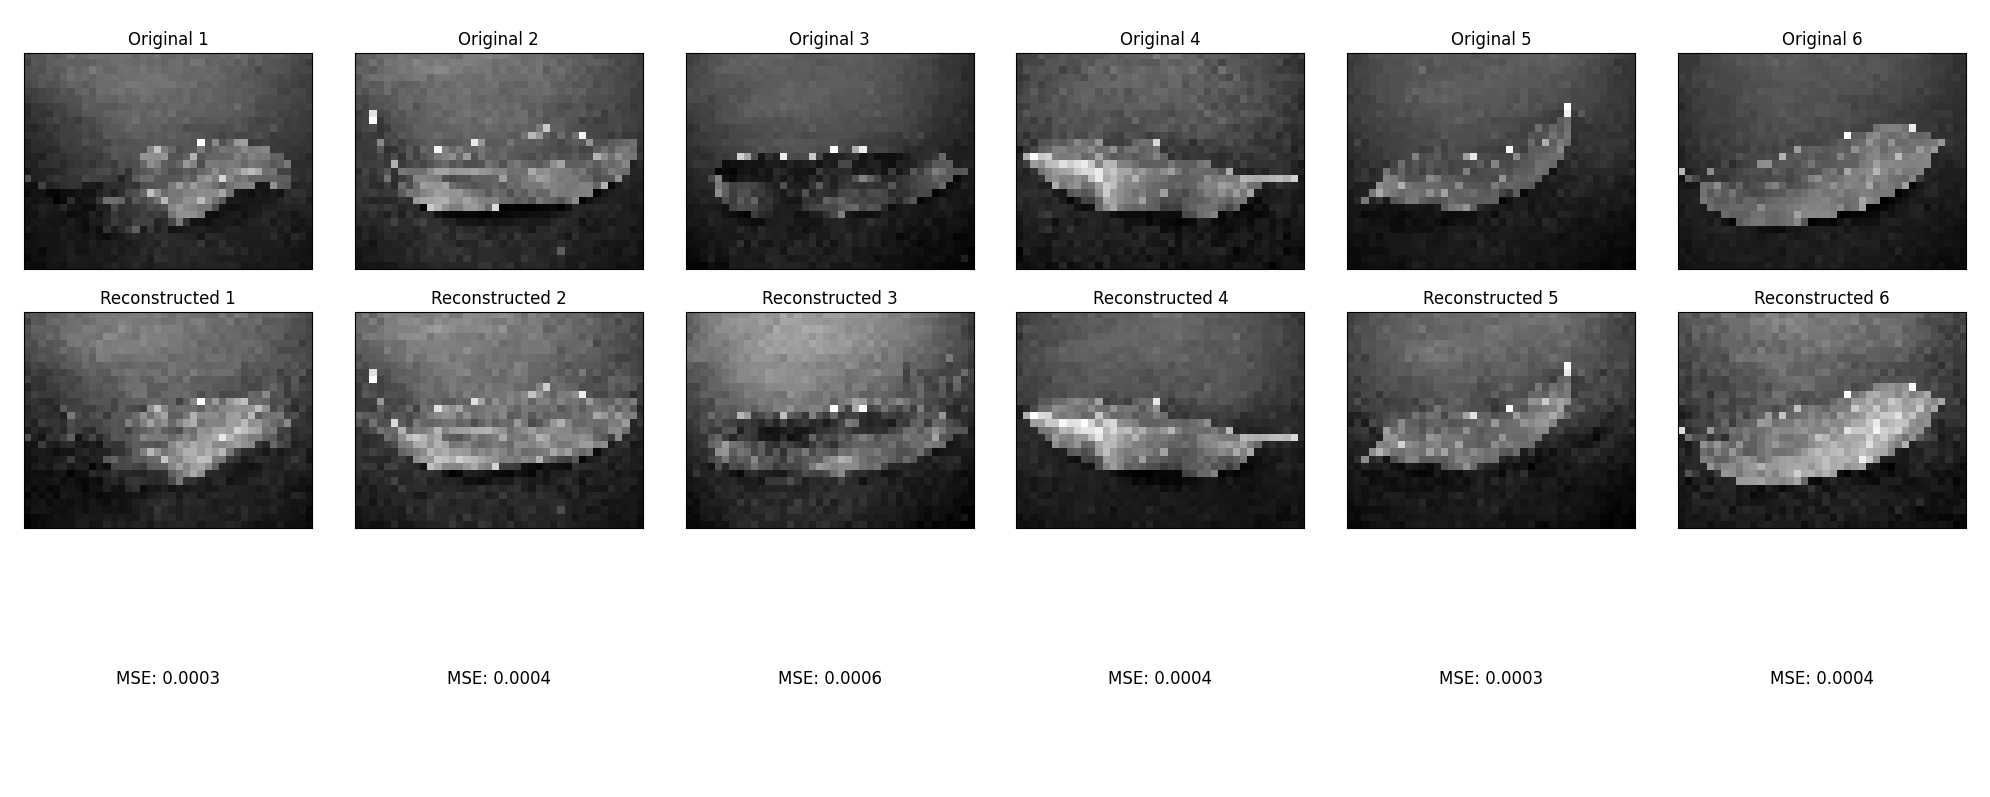

Image 1: MSE = 0.0003
Image 2: MSE = 0.0004
Image 3: MSE = 0.0006
Image 4: MSE = 0.0004
Image 5: MSE = 0.0003
Image 6: MSE = 0.0004

Average MSE: 0.0004


In [ ]:
# Number of images
n = 6

# Placeholder to store MSE values
mse_values = []

# Create a figure to display images
plt.figure(figsize=(20, 8))

for i in range(n):
    # Original image
    original = x_test[i].reshape(30, 40, 3)  # Assuming x_test is the dataset
    # Reconstructed image
    reconstructed = encoded_imgs[i].reshape(30, 40, 3)  # Assuming encoded_imgs are the reconstructions
    # Convert to grayscale
    original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    reconstructed = cv2.cvtColor(reconstructed, cv2.COLOR_BGR2GRAY)
    # Compute MSE
    mse = np.mean((original - reconstructed) ** 2)
    mse_values.append(mse)

    # Display Original Image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(original)
    plt.title(f"\nOriginal {i+1}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display Reconstructed Image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed)
    plt.title(f"\nReconstructed {i+1}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display MSE Value
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.text(0.5, 0.5, f"MSE: {mse:.4f}", fontsize=12, ha='center', va='center')
    plt.axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Print MSE values for reference
for i, mse in enumerate(mse_values, 1):
    print(f"Image {i}: MSE = {mse:.4f}")

# Compute the average MSE across all images
average_mse = np.mean(mse_values)
print(f"\nAverage MSE: {average_mse:.4f}")
